In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!ls -l ./Business*

-rw-r--r--@ 1 mitsuo.hangai  INTRA\Domain Users  278714 May  9 09:43 ./BusinessTeiryo.xlsx


In [3]:
yShop = pd.read_excel('BusinessTeiryo.xlsx', sheet_name='Sheet1')

In [4]:
yShop

,Column1,注文月,注文月日,商品ID,商品名,商品カテゴリ,値段,個数,商品売上,顧客ID,顧客状態,職業,性別,年齢
0,1,2017年4月,2017-04-01,10765,商品３１７,調味料,750,1,750,30461,新規会員,主婦,女性,55
1,2,2017年4月,2017-04-01,10934,商品３７９,パン,1000,1,2348,30461,新規会員,主婦,女性,55
2,3,2017年4月,2017-04-01,10106,商品５１,調味料,470,3,1410,30461,新規会員,主婦,女性,55
3,4,2017年4月,2017-04-01,10494,商品２１１,パスタ,191,1,191,30461,新規会員,主婦,女性,55
4,5,2017年4月,2017-04-01,10743,商品３０３,スイーツ,400,2,800,30461,新規会員,主婦,女性,55
5,6,2017年4月,2017-04-01,10735,商品２９８,スイーツ,400,2,800,30461,新規会員,主婦,女性,55
6,7,2017年4月,2017-04-01,10722,商品２８９,スイーツ,550,2,1100,30461,新規会員,主婦,女性,55
7,8,2017年4月,2017-04-01,10429,商品１７７,乾物,170,3,510,30461,新規会員,主婦,女性,55
8,9,2017年4月,2017-04-01,10198,商品１０３,乾物,500,2,1000,30461,新規会員,主婦,女性,55
9,10,2017年4月,2017-04-01,10733,商品２９６,調味料,880,1,880,30461,新規会員,主婦,女性,55


In [5]:
yShop[['商品売上','年齢']].head()

,商品売上,年齢
0,750,55
1,2348,55
2,1410,55
3,191,55
4,800,55


In [6]:
yShop_sales_Old = yShop[['商品売上','年齢']]

In [7]:
yShop_sales_Old.head()

,商品売上,年齢
0,750,55
1,2348,55
2,1410,55
3,191,55
4,800,55


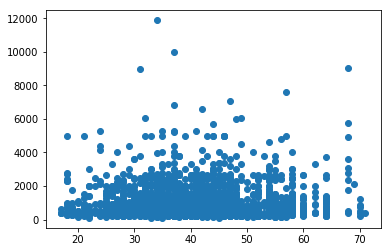

In [8]:
plt.scatter(yShop_sales_Old['年齢'],yShop_sales_Old['商品売上'])

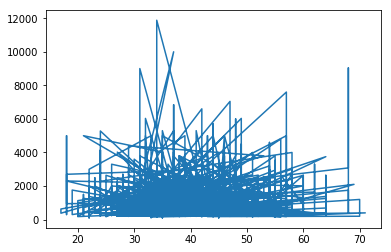

In [10]:
# わからん
plt.plot(yShop_sales_Old['年齢'],yShop_sales_Old['商品売上'])

In [24]:

def returnNendai(old):
    if old <=10:
        return 0
    elif old > 10:
        return old // 10 *10

In [23]:
returnNendai(32)

30

In [41]:
yShopSales_Nendai = yShop_sales_Old.assign(Nendai = (yShop_sales_Old['年齢'] // 10 * 10).astype(int))


In [42]:
yShopSales_Nendai.head()

,商品売上,年齢,Nendai
0,750,55,50
1,2348,55,50
2,1410,55,50
3,191,55,50
4,800,55,50


In [45]:
nendaiUriage = yShopSales_Nendai.groupby(['Nendai']).sum()

/Users/mitsuo.hangai/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


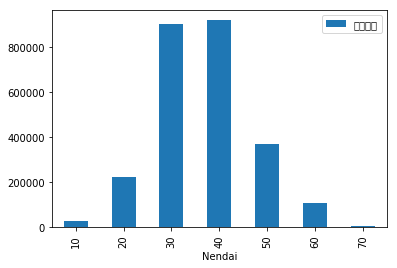

In [49]:
nendaiUriage.plot.bar(y=['商品売上'])

In [51]:
## 30th and 40th are most.
yShop[['商品売上','性別']].head()

,商品売上,性別
0,750,女性
1,2348,女性
2,1410,女性
3,191,女性
4,800,女性


/Users/mitsuo.hangai/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


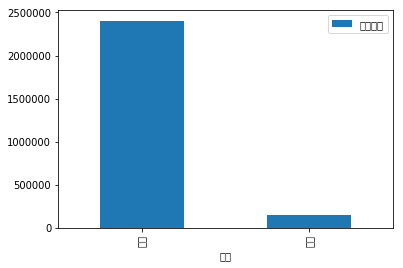

In [55]:
yShop[['商品売上','性別']].groupby(['性別']).sum().plot.bar(y=['商品売上'])

In [57]:
yShop[['商品売上','職業']].groupby(['職業']).sum()

,商品売上
職業,
その他,255453
不明,674894
主婦,719101
会社員,610643
学生,13261
無職,69021
自営業,212989


In [59]:
yShop[['商品売上','職業','性別']].groupby(['性別','職業']).sum()

商品売上
性別 職業         
女性 その他  255453
   不明   619875
   主婦   704051
   会社員  548697
   学生     7891
   無職    69021
   自営業  199272
男性 不明    55019
   主婦    15050
   会社員   61946
   学生     5370
   自営業   13717

In [61]:
yShop[['商品売上','職業','性別','商品カテゴリ']].groupby(['性別','職業','商品カテゴリ']).sum()

商品売上
性別 職業  商品カテゴリ        
女性 その他 ごはん      38131
       その他       8963
       サプリ       9000
       スイーツ     46577
       パスタ       6131
       パン       19171
       レトルト     38681
       乾物        3921
       加工品       1701
       調味料      56302
       調理器具      5628
       飲料       21247
   不明  ごはん      97624
       その他      19859
       サプリ      20060
       スイーツ     82192
       パスタ      31742
       パン       24902
       レトルト     79928
       乾物       14792
       加工品       3515
       調味料     170434
       調理器具      6954
       飲料       67873
   主婦  ごはん      76931
       その他      21350
       サプリ       3540
       スイーツ    133463
       パスタ      29642
       パン       37632
...               ...
男性 不明  パン        9906
       レトルト      2660
       乾物        1000
       加工品       1950
       調味料      18822
       飲料        8390
   主婦  パスタ       1730
       乾物        1450
       加工品        780
       調味料       8270
       飲料        2820
   会社員 ごはん        360
       その他       2802
       サプリ      14520
       スイーツ     14079
       パスタ       1770
       パン        2040
       レトルト      6336
       加工品        781
       調味料      18078
       飲料        1180
   学生  ごはん       2500
       その他        500
       スイーツ      1000
       調味料       1370
   自営業 ごはん        520
       サプリ        380
       スイーツ      2667
       パスタ       5480
       調味料       4670

[108 rows x 1 columns]

In [62]:
yShop[['商品売上','商品カテゴリ']].groupby(['商品カテゴリ']).sum()

,商品売上
商品カテゴリ,
ごはん,308969
その他,80911
サプリ,96820
スイーツ,412679
パスタ,118048
パン,164217
レトルト,316508
乾物,78575
加工品,29808


ここまでやってみたけど、
・顧客年代別売上→30代・40代の売上が多いよ。
・顧客性別売上→女性の方が圧倒的に多いよ。
・顧客職業別売上→会社員・主婦・不明が多いよ。よくわかんないよ。
・商品カテゴリ別売上→スイーツ・調味料・レトルトとかが多いよ。
ってことくらいしかわかんないよ。

もうちょっと顧客の層が分かる分析をしないといけないね。
女性の中で、どういう職業のどんな年代の人が多いのか？
とか。男性も。

どうしたいのかによってこの先どうするかが決まるかな。
女性に対してどういうふうに売り込むのか？
　添付販売を促すのか？
 　何時頃にどういう人が来てるのか？
  　タイムセールとかやって売上をあげられるか？
  売り場に課題は見られるか？
    高齢女性が買いやすい売り場になってるか？

とかとかとか